[View in Colaboratory](https://colab.research.google.com/github/12345k/100-Days-of-ML-Code/blob/master/text_classification_1.ipynb)

In [69]:
from sklearn.datasets import fetch_20newsgroups

import os
os.path

%matplotlib  inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from wordcloud import WordCloud
import pickle
from sklearn.externals import joblib

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [0]:
# categories = ['talk.religion.misc', 'soc.religion.christian',
#               'sci.space', 'comp.graphics']

#For all categories
train = fetch_20newsgroups(subset='train', categories=data.target_names)
test = fetch_20newsgroups(subset='test', categories=data.target_names)

In [44]:
print(train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [0]:
model.fit(train.data,train.target)
labels=  model.predict(test.data)

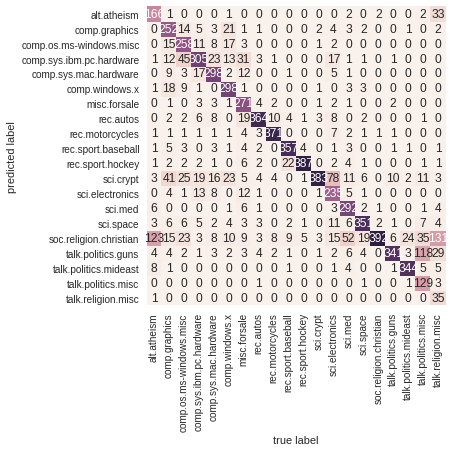

In [26]:

from sklearn.metrics  import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [0]:

def  predict_category (s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [28]:

predict_category ('sending a payload to the ISS')

'sci.space'

In [29]:
predict_category('discussing islam vs atheism')

'alt.atheism'

In [30]:
predict_category('determining the screen resolution')

'comp.graphics'

In [0]:
s="COOPERSTOWN, N.Y. — Chipper Jones was a minor leaguer when he first met Jim Thome. It was during a melee, Jones recalled on Sunday when both players were inducted into the Baseball Hall of Fame.“What felt like the hand of God grabbed me by the throat, pinned me to the netting of the backstop and said, ‘Don’t move,’ ” Jones said from the induction stage. With the brawl still going, Thome turned to Jones and asked, “You done?” Yes, Jones told the brawnier Thome, he was done.On a sun-splashed day at the Clark Sports Center a few minutes from the Hall of Fame, Jones and Thome were inducted along with Vladimir Guerrero, Trevor Hoffman, Jack Morris and Alan Trammell.“I didn’t think this day would ever come,” said Trammell, the Detroit Tigers shortstop for 20 years who, like Morris, was voted in by the Modern Era committee after the Baseball Writers Association of America did not elect him in his 15 years of eligibility."
text=s

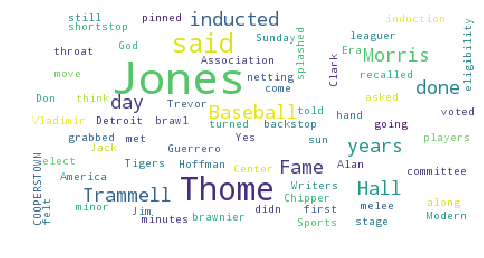

In [43]:
wordcloud = WordCloud(background_color="white",max_words=len(s),max_font_size=40, relative_scaling=.8).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [66]:
s = "A would like to schedule a meeting at 2 pm, Wednesday 1st of August.Looks like they had an internal discussion today and consolidated ideas and like to share the same during the meeting and make it a full-fledged process flow/plan. They are also getting their infra team to his meeting, in case there is dependency to discuss."
predict_category(s)

'soc.religion.christian'

In [0]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [70]:
filename = 'finalized_model.sav'
joblib.dump(model, filename)

['finalized_model.sav']